<a href="https://colab.research.google.com/github/victoriafabris/disciplina-dsp-audio-video/blob/main/atividade5/atividade_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade: Transformada Discreta de Fourier (DFT), Transformada Rápida de Fourier (FFT) e janelamento

## Efeito da resolução (número de bins)

1. Use os códigos de aulas anteriores (`tonegen`, por exemplo) para gerar um sinal que consiste na soma de duas senoides de 400Hz e 820 Hz, amostradas com uma frequência de 4 kHz. Depois, use a função `fft` para calcular os coeficientes $X(k)$ da DFT, com N=100. Apresente o código e faça o gráfico da magnitude da FFT.

Responda:

a. Qual a resolução em frequência neste caso?

b. Quais índices de frequência correspondem às senoides de frequências 400 Hz e 820 Hz?

c. Como a transformada de Fourier de uma função senoidal é uma função delta, por que não encontramos duas linhas simples no gráfico da FFT? Experimente usar a função `stem` no lugar de `plot`. 

d. Por que o espectro da senoide de 820 Hz sofreu espalhamento?

e. Aumente o número de pontos da transformada para N=200. É possível ver somente dois picos agora?

f. Gere um novo sinal que consiste na soma de duas senoides de 400Hz e 420 Hz, com a mesma  frequência de amostragem de 4 kHz Verifique os resultados com transformadas de 100 e 200 pontos. Você consegue ver os dois componentes de frequência separados? Por quê?

## Janelamento

2. O programa a seguir modifica o exercício anterior para aplicar janelamento na senoide, a fim de minimizar o vazamento espectral (spectral leakage) observado anteriormente. Quando se calcula o espectro dos sinais com uma janela retangular e uma janela Kaiser, observa-se que esta última tem o poder de reduzir o vazamento espectral da senoide de 820 Hz, ao custo de alargar o pico da senoide de 400 Hz. Observe o resultado deste programa.

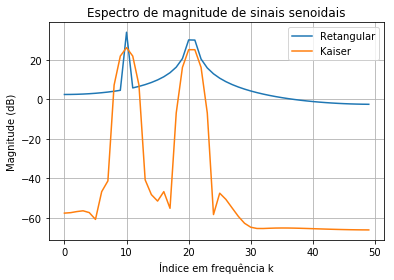

In [ ]:
#  Análise espectral de sinusoides usando janelas retangular e Kaiser
#  Baseado no livro "Embedded Signal Processing with the Micro Signal Architecture"
#    de Woon-Seng Gan and Sen M. Kuo
#
# Fernando S. Pacheco - IFSC - 2019

import numpy as np
import scipy.signal as sig
import scipy.fftpack as fftp
import matplotlib.pyplot as plt

f1 = 400 # parâmetros do sinal
f2 = 820
fs = 4000 

N = 100 # tamanho do sinal e da transformada em número de amostras
n = np.array(range(0,N))

x1n = np.sin(2*np.pi*f1*n/fs) # geração do sinal
x2n = np.sin(2*np.pi*f2*n/fs)

# Janelamento
xn_rec = x1n+x2n # Janela retangular: simplesmente somar os sinais individuais
beta = 8.96
wn = sig.kaiser(N,beta) # janela Kaiser
xn_kai = xn_rec*wn

# Espectro
Xk_rec = fftp.fft(xn_rec) # cálculo da transformada (DFT)
absXk_rec=20*np.log10(np.abs(Xk_rec)) # espectro de magnitude (dB)
Xk_kai = fftp.fft(xn_kai)
absXk_kai=20*np.log10(np.abs(Xk_kai))

# Gráfico de magnitude
plt.plot(absXk_rec[0:int(N/2)], label = 'Retangular')
plt.plot(absXk_kai[0:int(N/2)], label = 'Kaiser')

plt.grid(True)
plt.title('Espectro de magnitude de sinais senoidais')
plt.xlabel('Índice em frequência k')
plt.ylabel('Magnitude (dB)')
plt.legend()

Depois, modifique-o para:

a. Aplicar diferentes janelas. Observe as diferenças quanto ao vazamento espectral e à largura do lóbulo principal. Mostre os gráficos e comente os resultados.

b. Aplicar a janela de Kaiser com diferentes valores de beta. Apresente os gráficos e analise os resultados.